# Predicting with SVMs


In [1]:
# import appropriate analysis and ml tools

import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn import grid_search, svm
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [3]:
#import the raw data
raw_data = pd.read_csv("breast-cancer-wisconsin.data", 
                       names = ["id",  "Clump Thickness", "Uniformity of Cell Size","Uniformity of Cell Shape", 
                                  "Marginal Adhesion", "Single Epithelial Cell Size","Bare Nuclei", "Bland Chromatin",
                                  "Normal Nucleoli", "Mitoses", "Class"])
print(raw_data.shape)
raw_data.head()

(683, 11)


,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [4]:
# drop ID and Class columns
raw_data2 = raw_data.drop(['id','Class'], axis=1)

# normalize the data to have a mean of 0 and std deviation of 1 (standard normal distribution)
# normalize by subtracting raw scores from mean and dividing by std deviation (z-score)
norm_data = (raw_data2 - np.mean(raw_data2)) / np.std(raw_data2)
norm_data.head()

# map class variable to 1's (malignant) and 0's (benign)
norm_data['Class'] = raw_data['Class'].map({4:1, 2:0})
norm_data.head()


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484,0
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484,0
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484,0
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484,0
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484,0


In [5]:
# divide normalized data into features and labels
features = norm_data.drop('Class', axis=1)
labels = norm_data['Class']
print(labels.head())
features.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
0,0.197905,-0.702212,-0.741774,-0.639366,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484
1,0.197905,0.277252,0.262783,0.758032,1.695166,1.772867,-0.181827,-0.285105,-0.3484
2,-0.511643,-0.702212,-0.741774,-0.639366,-0.555608,-0.424217,-0.181827,-0.612927,-0.3484
3,0.552679,1.583204,1.602192,-0.639366,-0.105454,0.125054,-0.181827,1.354008,-0.3484
4,-0.156869,-0.702212,-0.741774,0.059333,-0.555608,-0.698853,-0.181827,-0.612927,-0.3484


In [15]:
# split data into training and test features and labels using 30% of data as validation/test set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(546, 9) (546,)
(137, 9) (137,)


# Cross Validated Grid Search

In [16]:
# create function svc_param_selection that optimizes combination of degree and C hyperparameters using an SVC with a
# polynomial kernel

def svc_param_selection(X, y, nfolds):
    """ When using a SVM with a polynomial kernel there are two hyperparameters to tune. The value of C and 
    the degree of the polynomial, d. This function, svc_param_selection will find the optimal pair of (C, degree)
    that gives the best results on a test set using sklearn's GridSearchCV (cross validation) method."""
    #the slack penalty hyperparameter
    Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
    #degrees of polynomial kernel of svc
    degrees = [1, 2, 3, 4, 5]
    #initialize the paremeter grid as dictionary
    param_grid = {'C': Cs, 'degree' : degrees}
    #initialize search for best parameters using input nfold cross validation
    search = GridSearchCV(SVC(kernel='poly'), param_grid, cv=nfolds)
    #fit the search object to input training data
    search.fit(X, y)
    #return the best parameters
    search.best_params_
    return search.best_params_

In [31]:
c = svc_param_selection(X_train, y_train, 2)['C']
deg = svc_param_selection(X_train, y_train, 2)['degree']

In [33]:
c, deg

(1, 1)

In [34]:
final_svc_poly = SVC(C=c, degree=deg, kernel='poly')
final_svc_poly.fit(X_train, y_train)
final_svc_poly.score(X_test, y_test)

0.9708029197080292

In [35]:

Cs = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
degrees = [1, 2, 3, 4, 5]

train_acc = []
test_acc = []

for d in degrees:
    for c in Cs:
        #print("C = ", c, ", degree = ", d)
        svc = SVC(C=c, degree=d, kernel='poly')
        svc.fit(X_train, y_train)
        #print(svc.score(X_train, y_train))
        train_acc.append((svc.score(X_train, y_train)))
        #print((svc.score(X_test, y_test)))
        test_acc.append((svc.score(X_test, y_test)))
#print(max(test_acc))

# Heat Map of Test Accuracies

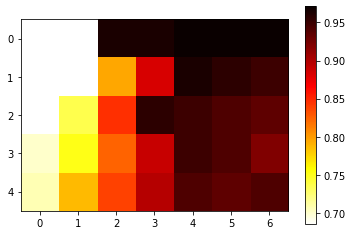

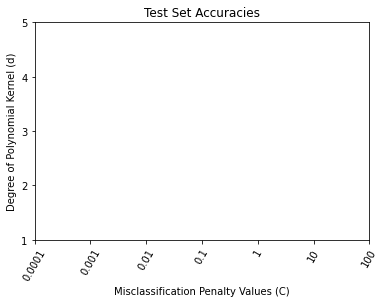

In [36]:
# load test accuracies into 2D numpy array
acc_img = np.array(test_acc).reshape(len(degrees), len(Cs))

# plot heatmap of accuracies
plt.imshow(acc_img, cmap=plt.cm.hot_r)
plt.colorbar()
plt.show()
plt.title('Test Set Accuracies')
plt.xticks(np.arange(len(Cs)), Cs, rotation=60)
plt.yticks(np.arange(len(degrees)), degrees)
plt.xlabel('Misclassification Penalty Values (C)')
plt.ylabel('Degree of Polynomial Kernel (d)');

In [37]:
final_svc_poly = SVC(C=c, degree=deg, kernel='poly')
final_svc_poly.fit(X_train, y_train)
final_svc_poly.score(X_test, y_test)

0.9708029197080292

In [38]:
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_test, final_svc_poly.predict(X_test))
confusion_mat

array([[92,  2],
       [ 2, 41]])